# Full calculation of matter TT temperature correlations $C_l$ of primordial radiation using CLASS

This notebook uses the excellent [CLASS](http://class-code.net/) code to do a full realistic calculation CMB in the Early Universe

In [1]:
%%bash
if ! python3 -c "import classy" 2>/dev/null; then
    git clone --depth=1 -b 2.9 https://github.com/lesgourg/class_public.git
    cd class_public
    PYTHON=python3 make -j all >/dev/null
fi

In [2]:
from classy import Class

In [3]:
from math import pi
import numpy as np
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = {'retina','png'}

In [5]:
# create instance of the class "Class"
LambdaCDM = Class()

Prepare the list to store the parameters and results of each simulations

In [6]:
simulations = []

In [7]:
## Runs simulations for given parameter set and stores the result in pars and Pk
def run_Class_Cl(pp):
    LambdaCDM.struct_cleanup()
    LambdaCDM.empty()
    LambdaCDM.set(pp)
    LambdaCDM.set({'output':'tCl,pCl,lCl', 'lensing':'yes'})
    LambdaCDM.compute()
    cls = LambdaCDM.lensed_cl(2500)
    l = cls['ell'][2:] # Values of l, dropping monopole and dipole
    tt = cls['tt'][2:] # Values of C_l for TT correlations
    return (LambdaCDM.pars, l, tt)

Run simulations and add to the `simulations` list. Here we have the default CDM parameters.

Note, $\Omega_\Lambda$ is calculated automatically to satisfy
$$
\Omega_b+\Omega_{cdm}+\Omega_{rad}+\Omega_k = 1
$$
See the (extremely) complete list of possible cosmologicla parameters in [explanatory.ini](https://github.com/lesgourg/class_public/blob/master/explanatory.ini) of the [CLASS](http://class-code.net/) package, and references to original publications.

By convention `omega_cdm` is defined as $\Omega_{cdm}h^2$ (and similar). Note also that $\Omega_\gamma h^2$ and not $\Omega_{rad}$ is used as the input here.

In [8]:
simulations.append(
    run_Class_Cl({'omega_g': 2.473e-5,
                   'omega_b': 0.032032,
                   'omega_cdm': 0.12038,
                   'h': 0.67556,
                   'Omega_k': 0.0,
                   'A_s': 2.215e-9,
                   'n_s': 0.9619}) )

You can run more simulations with other sets of parameters:

In [9]:
simulations.append(
    run_Class_Cl({'omega_g': 2.473e-5,
                  'omega_b': 0.005,
                  'omega_cdm': 0.12038+0.032032-0.005,
                  'h': 0.67556,
                  'Omega_k': 0.0,
                  'A_s': 2.215e-9,
                  'n_s': 0.9619}) )

Plot the results!

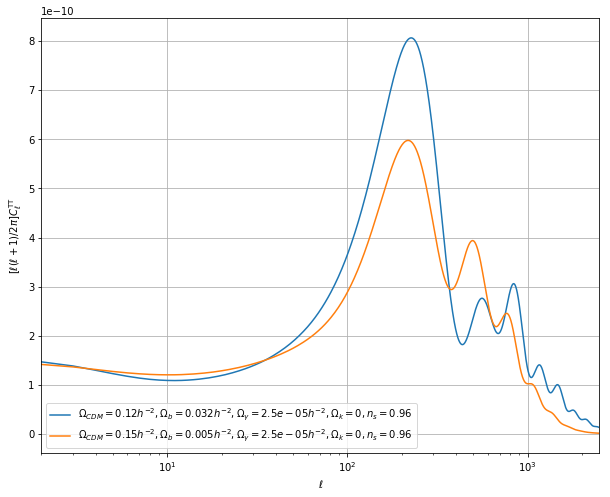

In [10]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.grid()
plt.xlim(2,2500)
for pars, l, tt in simulations:
    plt.semilogx(l, tt*l*(l+1)/2./pi,
                 label="$\Omega_{CDM}=%4.2gh^{-2}, \Omega_b=%4.2gh^{-2}, \Omega_\gamma=%4.2gh^{-2}, \Omega_k=%4.2g, n_s=%4.2g$"%(
                     pars['omega_cdm'], pars['omega_b'], pars['omega_g'], pars['Omega_k'], pars['n_s']))
plt.legend()